In [1]:
%load_ext autoreload
%autoreload 2

import os

import bento
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import cv2 as cv
import rasterio
import seaborn as sns
from joblib import Parallel, delayed
from PIL import Image
from shapely.geometry import Polygon
from tqdm.auto import tqdm

# Cell masks

  0%|          | 0/70 [00:00<?, ?it/s]

/home/clarence/miniconda3/envs/bento/lib/python3.9/site-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/clarence/miniconda3/envs/bento/lib/python3.9/site-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/clarence/miniconda3/envs/bento/lib/python3.9/site-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/clarence/miniconda3/envs/bento/lib/python3.9/site-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path

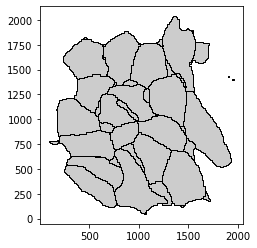

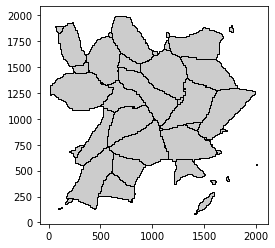

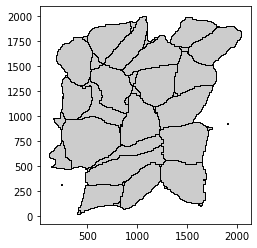

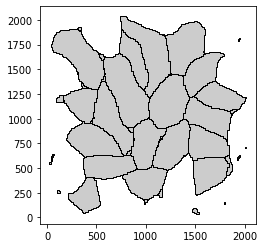

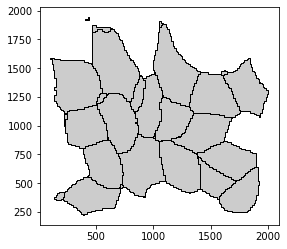

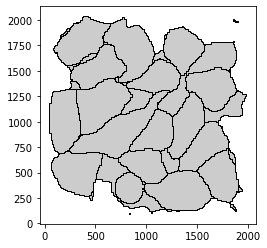

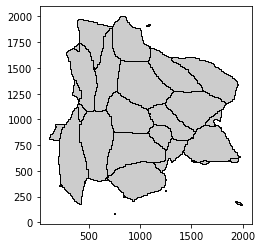

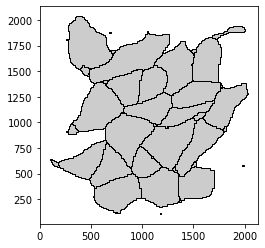

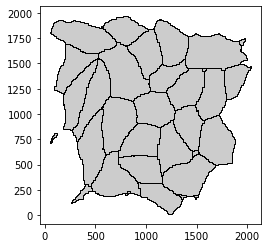

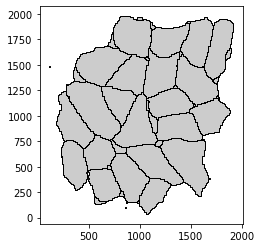

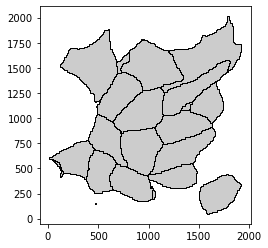

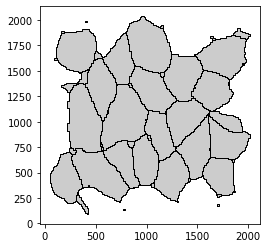

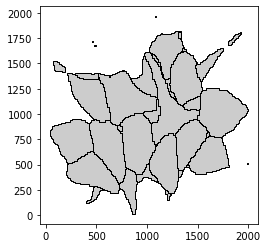

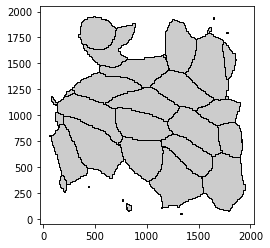

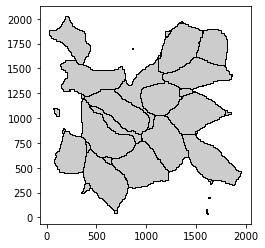

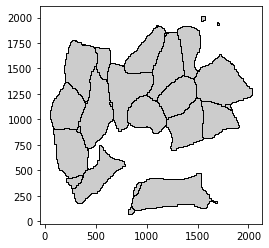

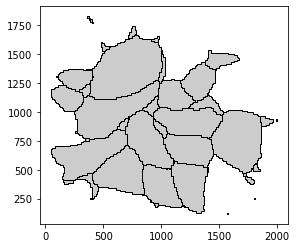

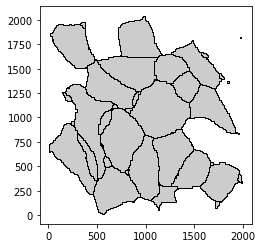

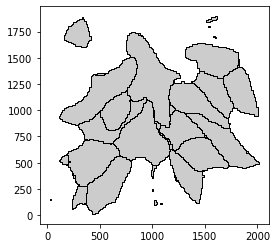

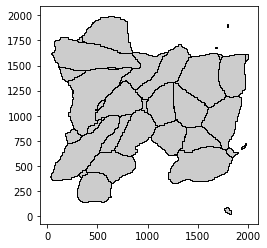

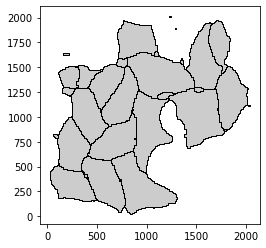

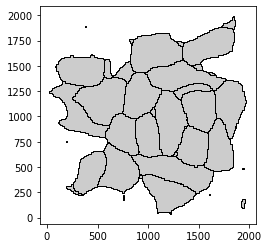

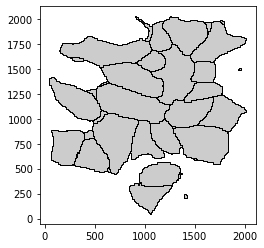

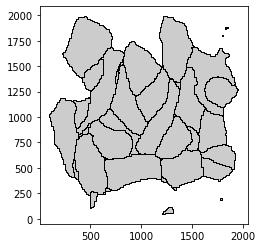

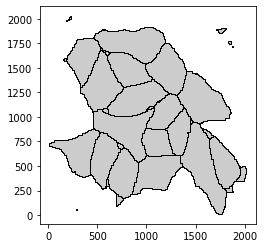

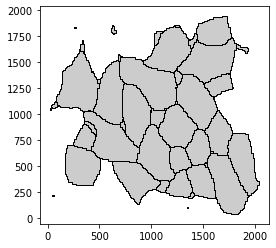

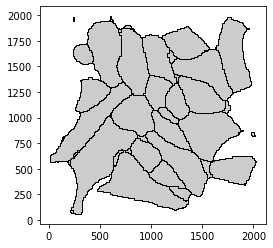

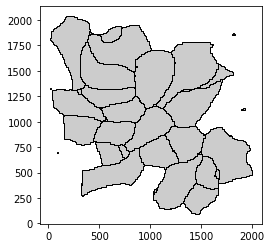

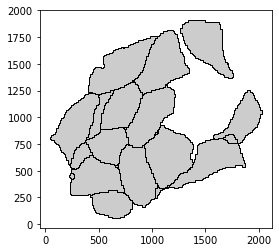

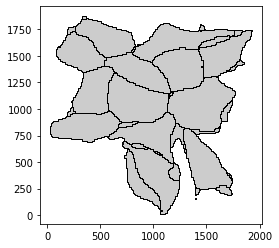

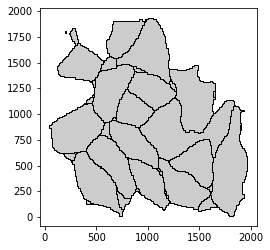

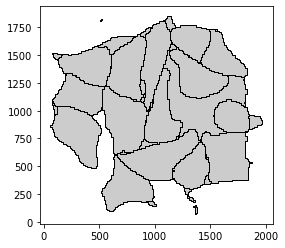

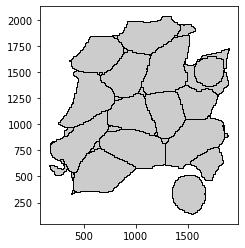

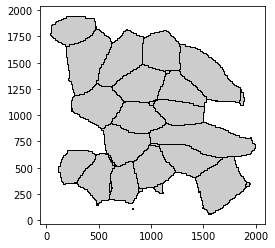

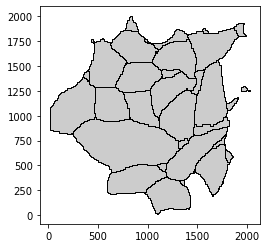

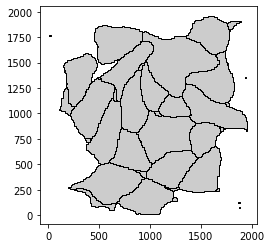

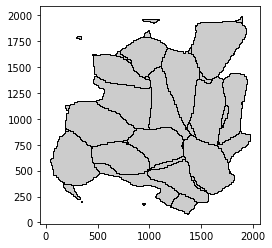

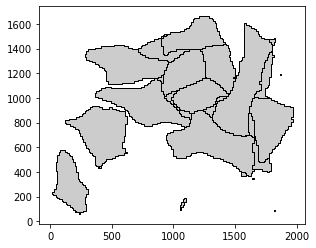

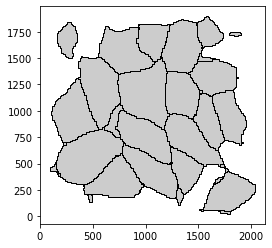

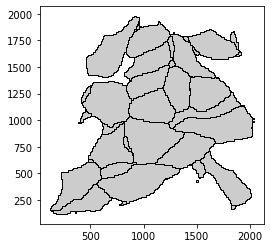

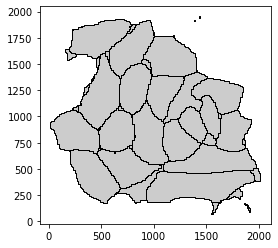

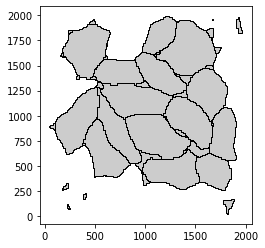

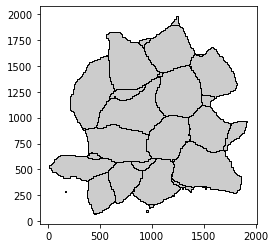

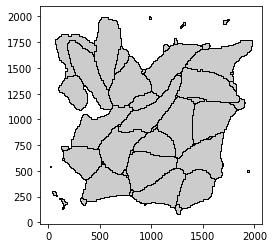

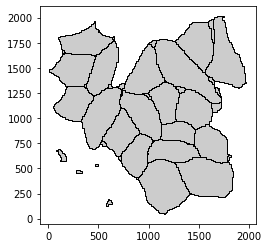

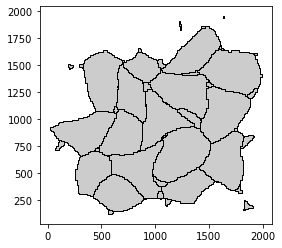

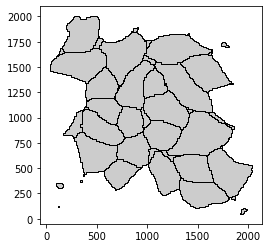

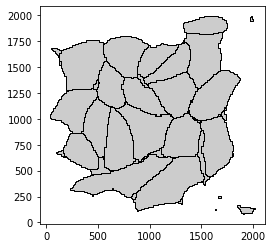

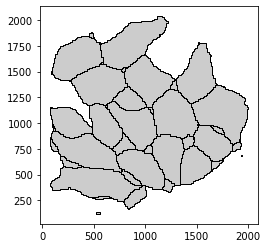

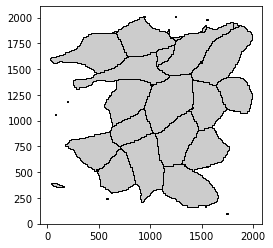

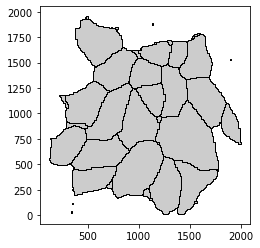

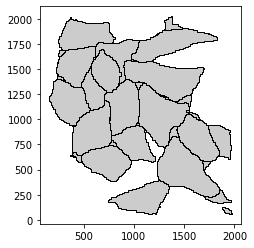

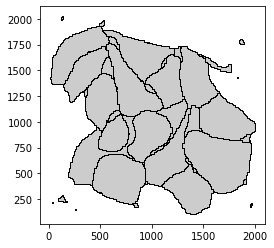

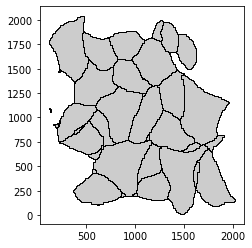

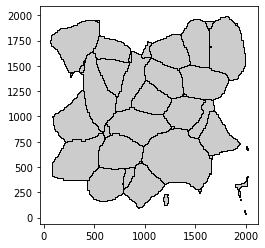

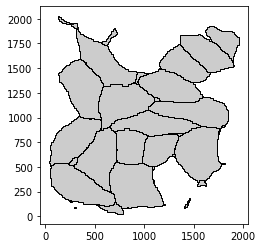

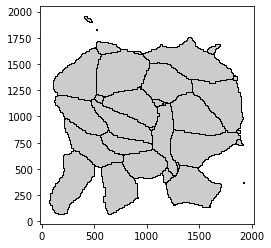

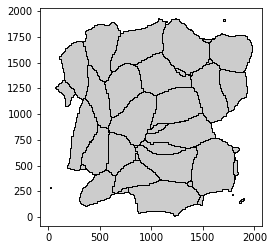

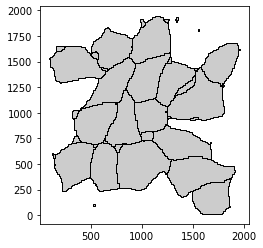

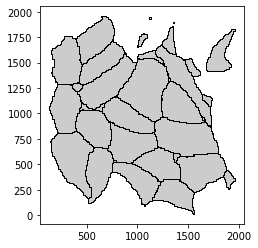

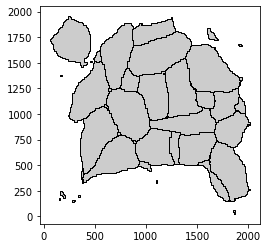

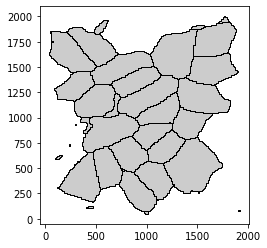

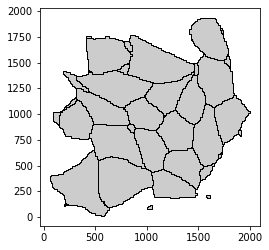

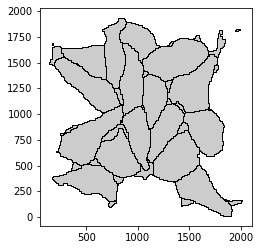

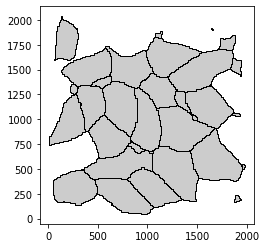

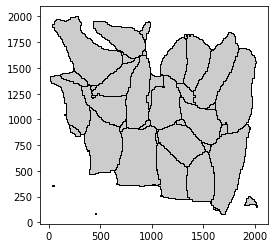

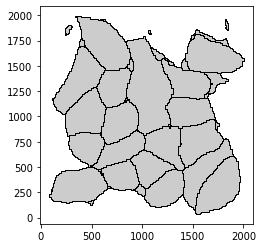

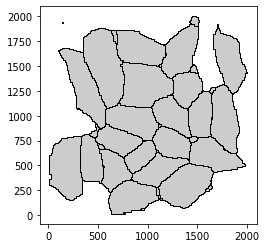

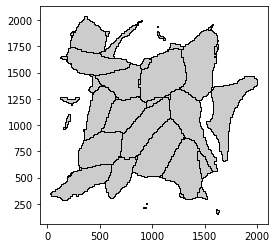

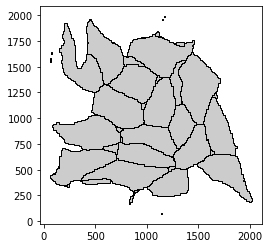

In [7]:
celldir = "data/u2os_merfish/raw/Cell_masks"
for f in tqdm(os.listdir(celldir)):
    fid = f.split("_")[2]
    cell_ds = rasterio.open(f"{celldir}/{f}")
    cell_contours = rasterio.features.shapes(cell_ds.read(1))
    cell_polygons = [Polygon(p["coordinates"][0]) for p, v in cell_contours]
    df = gpd.GeoDataFrame(geometry=cell_polygons)

    minx, miny, maxx, maxy = df.total_bounds
    crop_poly = Polygon(
        [
            [minx + 1, miny + 1],
            [maxx - 1, miny + 1],
            [maxx - 1, maxy - 1],
            [minx + 1, maxy - 1],
        ]
    )

    # Only query for masks that do not overlap a 100px margin around the edge of each tile
    df = df.loc[df.geometry.map(crop_poly.contains)]

    df.reset_index().plot(facecolor=(0, 0, 0, 0.2), edgecolor="black")
    df.to_file(f"data/u2os_merfish/shapefile/{fid}_cell.shp")

# Nuclear masks

  0%|          | 0/70 [00:00<?, ?it/s]

/home/clarence/miniconda3/envs/bento/lib/python3.9/site-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/clarence/miniconda3/envs/bento/lib/python3.9/site-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/clarence/miniconda3/envs/bento/lib/python3.9/site-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/clarence/miniconda3/envs/bento/lib/python3.9/site-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path

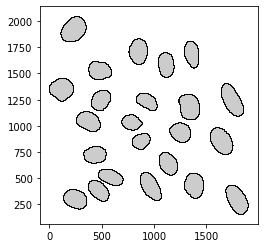

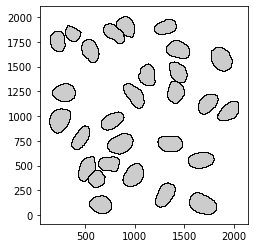

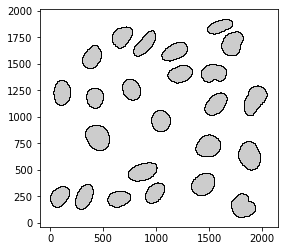

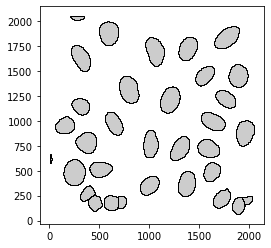

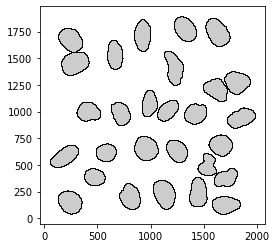

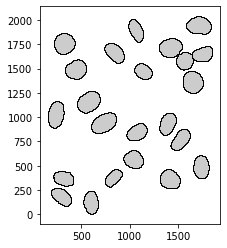

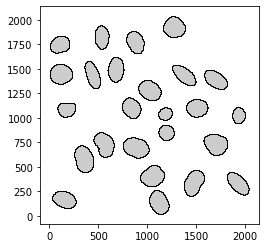

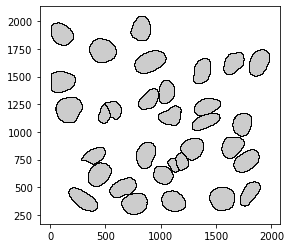

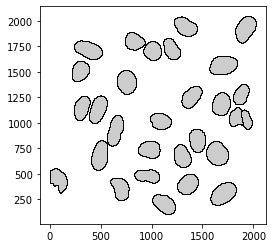

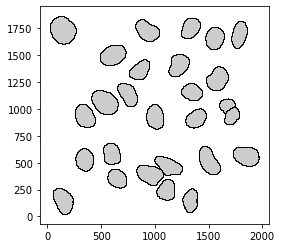

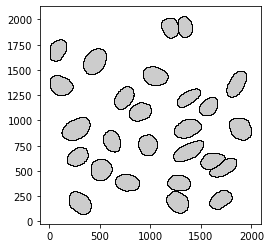

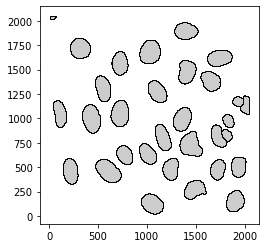

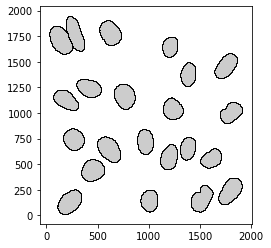

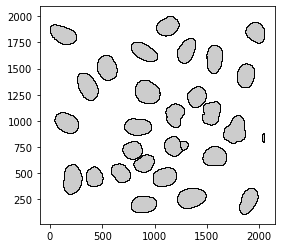

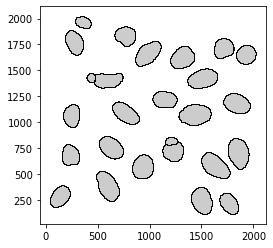

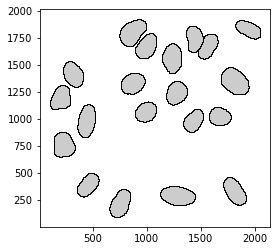

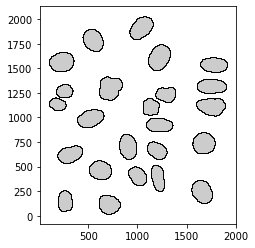

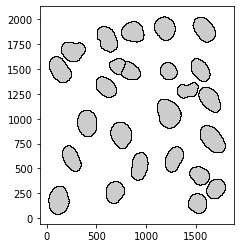

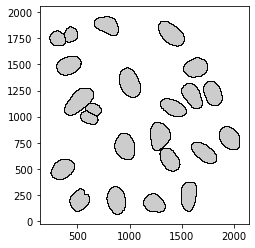

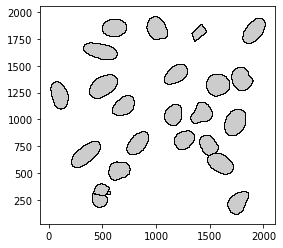

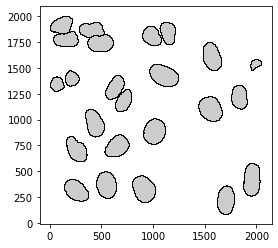

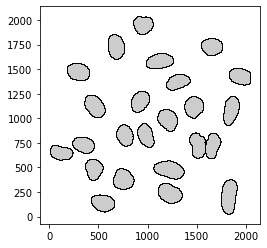

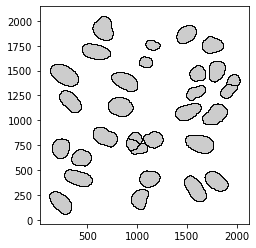

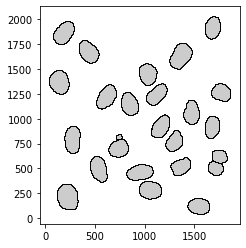

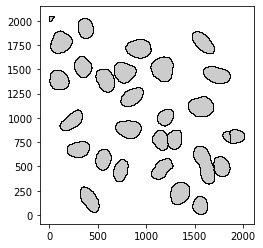

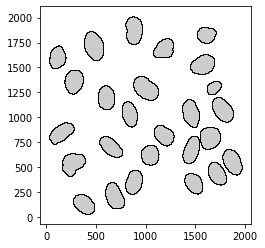

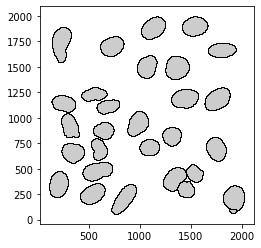

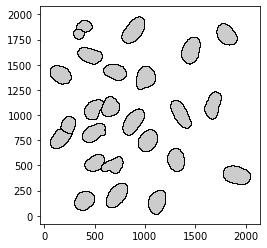

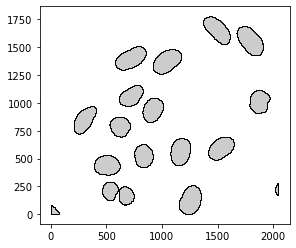

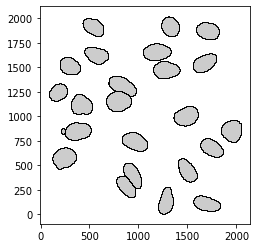

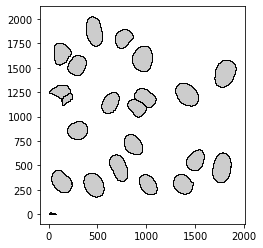

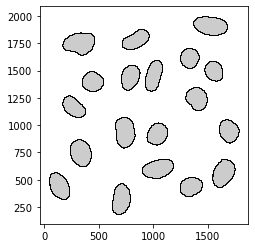

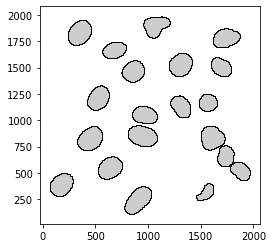

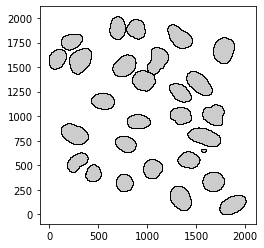

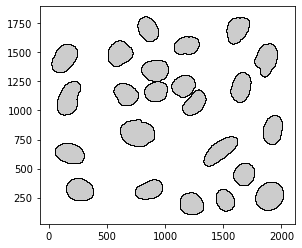

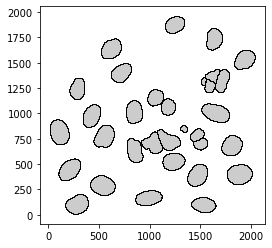

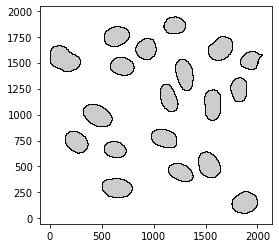

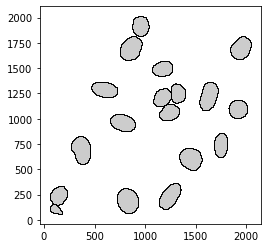

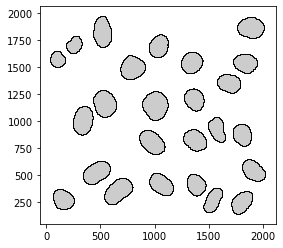

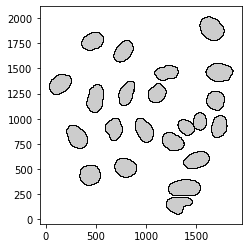

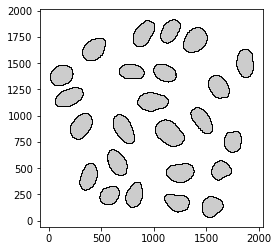

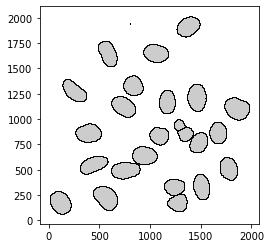

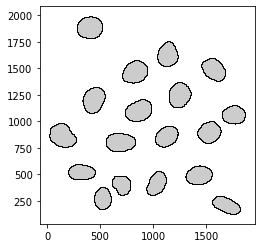

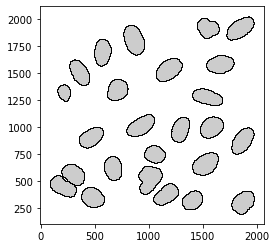

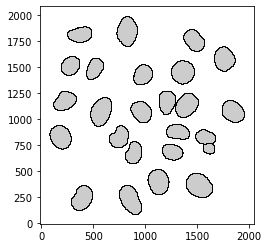

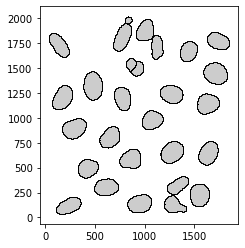

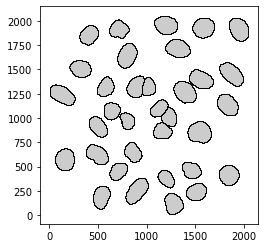

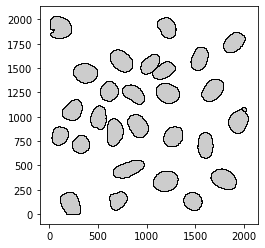

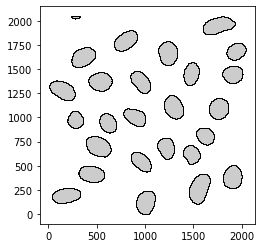

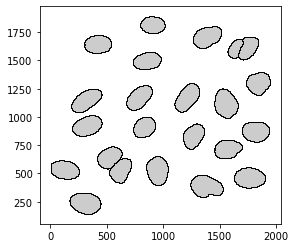

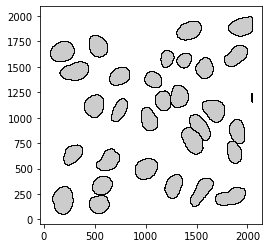

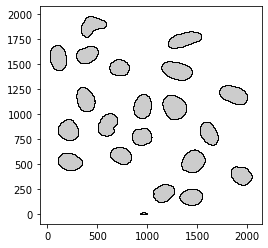

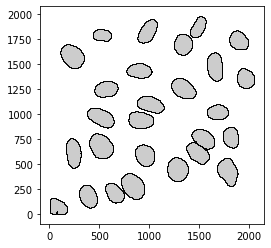

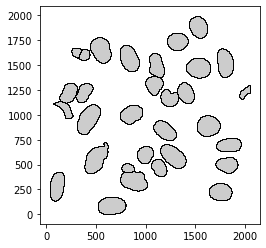

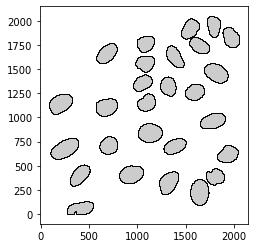

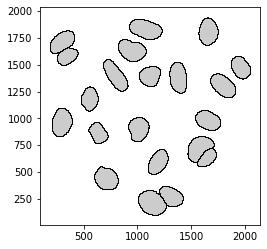

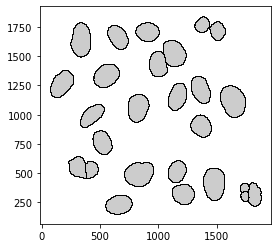

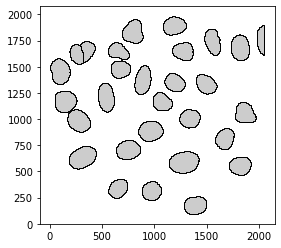

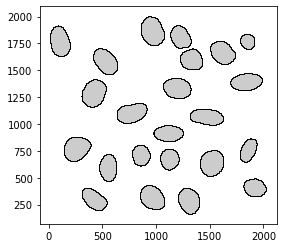

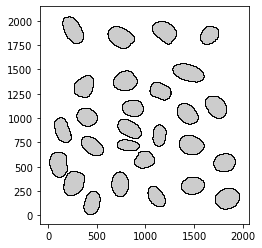

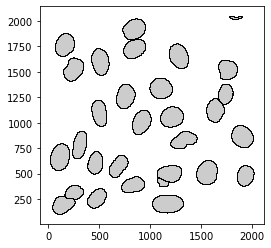

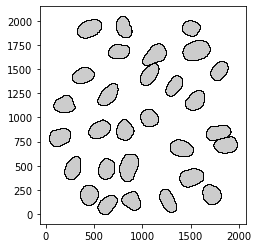

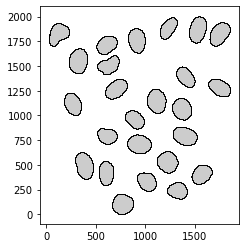

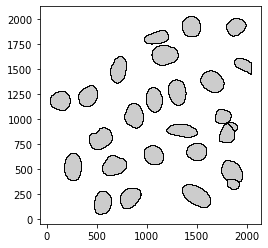

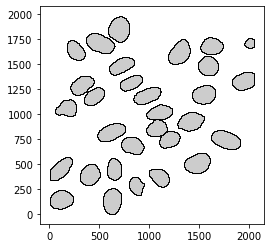

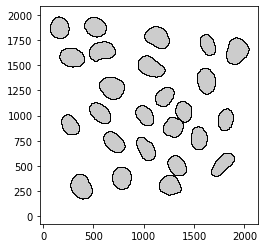

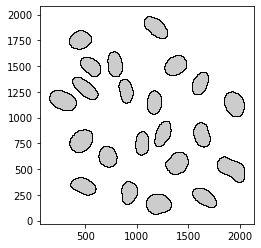

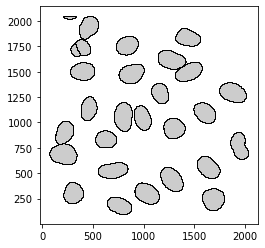

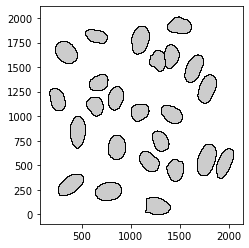

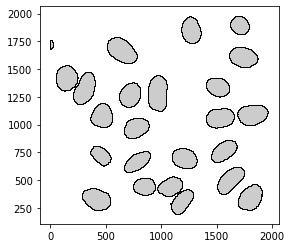

In [8]:
nucdir = "data/u2os_merfish/raw/Nucleus_masks"
for f in tqdm(os.listdir(nucdir)):
    fid = f.split("_")[3][1:]
    nuc_ds = rasterio.open(f"{nucdir}/{f}")
    nuc_contours = rasterio.features.shapes(nuc_ds.read(1))
    nuc_polygons = [Polygon(p["coordinates"][0]) for p, v in nuc_contours]
    df = gpd.GeoDataFrame(geometry=nuc_polygons)

    minx, miny, maxx, maxy = df.total_bounds
    crop_poly = Polygon(
        [
            [minx + 1, miny + 1],
            [maxx - 1, miny + 1],
            [maxx - 1, maxy - 1],
            [minx + 1, maxy - 1],
        ]
    )

    # Remove anything that touches the image boundary
    df = df.loc[df.geometry.map(crop_poly.contains)]

    df.reset_index().plot(facecolor=(0, 0, 0, 0.2), edgecolor="black")
    df.to_file(f"data/u2os_merfish/shapefile/{fid}_nuc.shp")

#  Points

In [2]:
points = pd.read_csv("data/u2os_merfish/raw/barcodes.zip", compression="zip")

In [3]:
codebook = pd.read_csv("data/u2os_merfish/raw/codebook_alex_130gene.csv")

In [4]:
barcode2gene = codebook["name"].to_dict()

In [5]:
points["gene"] = points["barcode_id"].map(barcode2gene)

In [11]:
points.shape

(26093639, 8)

In [23]:
points

,barcode_id,global_x,global_y,global_z,x,y,fov,gene
0,5,-11888.481,-2935.2903,0.0,1023.31650,154.71848,0,notarget001
1,6,-11871.179,-2882.9275,0.0,1183.52770,639.56067,0,notarget002
2,6,-11862.901,-2848.9226,0.0,1260.17530,954.42100,0,notarget002
3,7,-11814.500,-2821.1072,0.0,1708.32970,1211.97130,0,notarget003
4,7,-11850.905,-2792.4285,0.0,1371.25040,1477.51310,0,notarget003
...,...,...,...,...,...,...,...,...
26093634,127,-12438.844,-2224.4749,69.0,441.81622,666.15796,69,MALAT1
26093635,127,-12442.424,-2222.1565,69.0,408.66090,687.62530,69,MALAT1
26093636,127,-12440.119,-2221.9897,69.0,430.00000,689.16785,69,MALAT1
26093637,127,-12310.002,-2211.7893,69.0,1634.78830,783.61710,69,MALAT1


<AxesSubplot:xlabel='global_x', ylabel='global_y'>

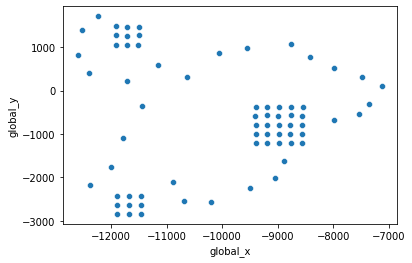

In [28]:
sns.scatterplot(
    data=points.sample(1000000)
    .groupby("fov")
    .apply(lambda df: df[["global_x", "global_y"]].mean()),
    x='global_x',
    y='global_y'
)

In [78]:
points = gpd.GeoDataFrame(
    points,
    geometry=gpd.points_from_xy(points["x"], points["y"]),
)

In [85]:
for fov in tqdm(points["fov"].unique()):
    fov_fmted = fov
    if len(str(fov)) == 1:
        fov_fmted = f"0{fov}"
    points.loc[points["fov"] == fov].to_file(
        f"data/u2os_merfish/shapefile/{fov_fmted}_points.shp"
    )

  0%|          | 0/70 [00:00<?, ?it/s]

# Write to h5ad

In [2]:
datadir = "data/u2os_merfish/shapefile"
files = [f for f in os.listdir(datadir) if f.endswith('cell.shp')]

for f in tqdm(files):

    fid = f.split("_")[0]
    cell_shp = gpd.read_file(f"{datadir}/{fid}_cell.shp")
    nuc_shp = gpd.read_file(f"{datadir}/{fid}_nuc.shp")
    molecules = gpd.read_file(f"{datadir}/{fid}_points.shp")
    adata = bento.io.prepare(molecules, cell_shp, other_seg=dict(nucleus=nuc_shp))

    bento.io.write_h5ad(adata, outfile)


# Parallel(n_jobs=4)(delayed(to_h5ad)(f) for f in tqdm(point_files))

  0%|          | 0/70 [00:00<?, ?it/s]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Combine as single h5ad

In [2]:
datadir = "data/u2os_merfish"

all_adatas = []
for f in tqdm(os.listdir(datadir)):
    if f.startswith("fov") and f.endswith("h5ad"):
        adata = bento.io.read_h5ad(f"{datadir}/{f}")
        all_adatas.append(adata)

  0%|          | 0/87 [00:00<?, ?it/s]

In [3]:
adatas = bento.io.concatenate(all_adatas)

In [4]:
bento.io.write_h5ad(adatas, "data/u2os_merfish/u2os_merfish_raw.h5ad")

... storing 'cell_shape' as categorical
... storing 'nucleus_shape' as categorical
